
Notebook from [Predicting the ‘Future’ with Facebook’s Prophet](https://towardsdatascience.com/predicting-the-future-with-facebook-s-prophet-bdfe11af10ff)

## Installation

In [24]:
# Install a conda package in the current Jupyter kernel
import sys
!conda install --yes --prefix {sys.prefix} pystan
!conda install --yes --prefix {sys.prefix} -c conda-forge fbprophet
!conda install --yes --prefix {sys.prefix} xlrd
!conda install --yes --prefix {sys.prefix} openpyxl

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.



## Importing the dataset

In [2]:
import pandas as pd
import numpy as np
from fbprophet import Prophet
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")# for pretty graphs
df = pd.read_excel('data/medium_stats.xlsx')
df.head()

ERROR:fbprophet:Importing plotly failed. Interactive plots will not work.


,Date,Views
0,2018-07-02,21
1,2018-07-03,45
2,2018-07-04,31
3,2018-07-05,25
4,2018-07-06,31


## Analysing the datatypes

In [3]:
df.dtypes

Date     datetime64[ns]
Views             int64
dtype: object

## Plotting to get insights

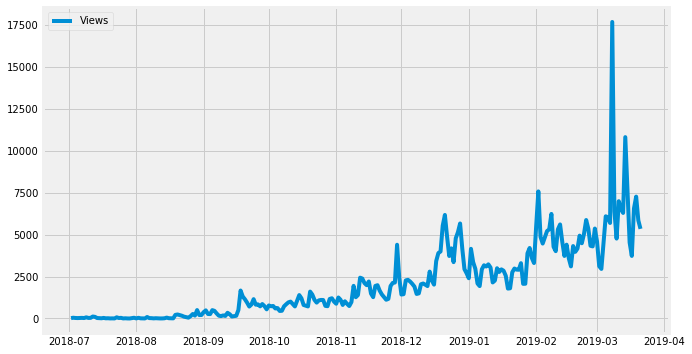

In [4]:
plt.figure(figsize=(10,6))
plt.plot(df.set_index('Date'))
plt.legend(['Views'])


In [5]:
## Removing the Outliers: Optional

In [6]:
"""df.loc[(df['Views'] > 10000), 'Views'] = np.nan
plt.figure(figsize=(10,6))
plt.plot(df.set_index('Date'))
plt.legend(['Views'])"""

"df.loc[(df['Views'] > 10000), 'Views'] = np.nan\nplt.figure(figsize=(10,6))\nplt.plot(df.set_index('Date'))\nplt.legend(['Views'])"

## Converting Views column to its log value

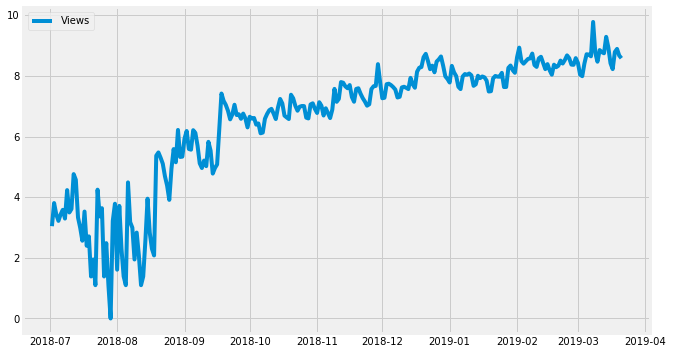

In [7]:
df['Views'] = np.log(df['Views'])
plt.figure(figsize=(10,6))
plt.plot(df.set_index('Date'))
plt.legend(['Views'])

## Making the dataset 'Prophet' compliant.

In [8]:
df.columns = ['ds','y']
df.head()

,ds,y
0,2018-07-02,3.044522
1,2018-07-03,3.806662
2,2018-07-04,3.433987
3,2018-07-05,3.218876
4,2018-07-06,3.433987


## Making Predictions

Prophet follows the sklearn model API wherein an instance of the Prophet class is created and then the fit and predict methods are called. The model is instantiated by a new Prophet object and followed by calling its fit method and passing in the historical dataframe.

In [9]:
m1 = Prophet(daily_seasonality=True)
m1.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/srv/conda/envs/notebook/lib/python3.7/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


Prophet will by default fit weekly and yearly seasonalities if the time series is more than two cycles long. It will also fit daily seasonality for a sub-daily time series. You can add other seasonalities (monthly, quarterly, hourly)if required.

In [10]:
future1 = m1.make_future_dataframe(periods=60)
forecast1 = m1.predict(future1)
forecast1.tail().T

,318,319,320,321,322
ds,2019-05-16 00:00:00,2019-05-17 00:00:00,2019-05-18 00:00:00,2019-05-19 00:00:00,2019-05-20 00:00:00
trend,10.0387,10.0505,10.0622,10.0739,10.0856
yhat_lower,8.61594,8.58669,8.23759,8.27063,8.84392
yhat_upper,10.5271,10.4581,10.1564,10.0862,10.6752
trend_lower,9.75181,9.75195,9.75497,9.75933,9.7614
trend_upper,10.2786,10.2977,10.3152,10.3353,10.3545
additive_terms,-0.454929,-0.492421,-0.810528,-0.869555,-0.331844
additive_terms_lower,-0.454929,-0.492421,-0.810528,-0.869555,-0.331844
additive_terms_upper,-0.454929,-0.492421,-0.810528,-0.869555,-0.331844
daily,-0.525892,-0.525892,-0.525892,-0.525892,-0.525892


In [11]:
forecast1[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
318,2019-05-16,9.583806,8.615943,10.527073
319,2019-05-17,9.558042,8.586693,10.458071
320,2019-05-18,9.251662,8.237588,10.156386
321,2019-05-19,9.204363,8.270628,10.086175
322,2019-05-20,9.753801,8.843923,10.675199


Since we took the log of Views, let's convert back to original values 

In [12]:
np.exp(forecast1[['yhat', 'yhat_lower', 'yhat_upper']].tail())

,yhat,yhat_lower,yhat_upper
318,14527.608878,5518.949836,37312.115783
319,14158.095824,5359.859595,34824.318979
320,10421.877089,3780.410525,25755.059511
321,9940.400243,3907.403375,24008.794876
322,17219.560935,6932.135494,43269.316877


## Plotting the Forecast

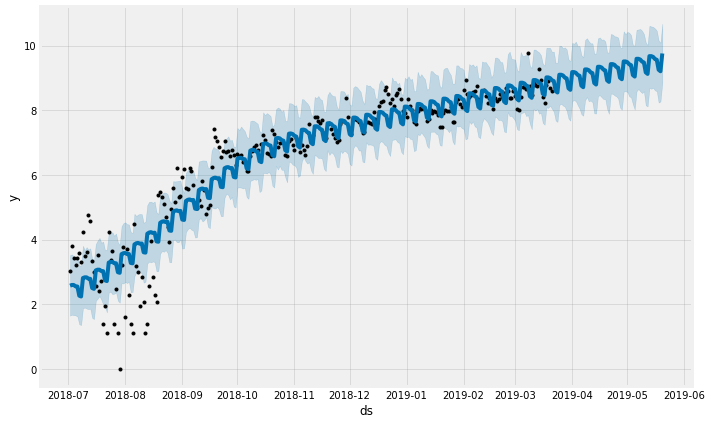

In [13]:
m1.plot(forecast1);

## Plotting the forecast components

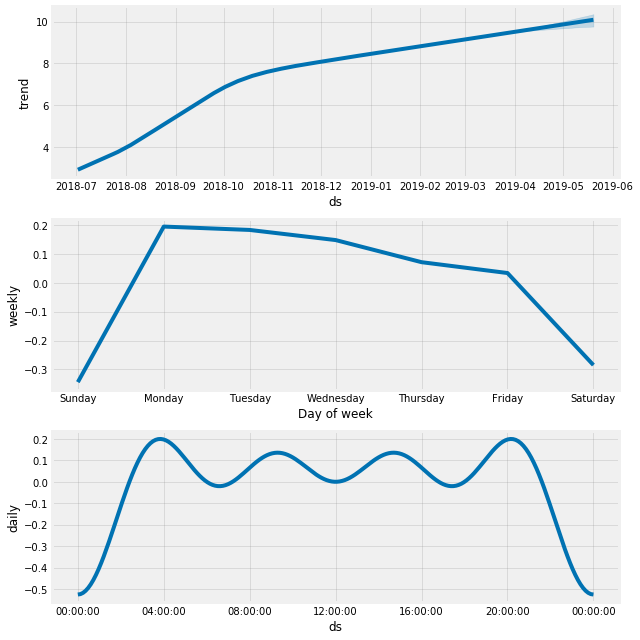

In [14]:
m1.plot_components(forecast1);

## Holiday Effect

In [15]:

articles = pd.DataFrame({
  'holiday': 'Article_Published',
  'ds': pd.to_datetime(['2018-07-02', '2018-07-06', '2018-07-08',
                        '2018-07-09', '2018-07-12', '2018-07-19', '2018-07-26', '2018-07-31',
                        '2018-08-06', '2018-08-15', '2018-07-19', '2018-08-26', '2018-08-31',
                        '2018-09-01', '2018-09-04', '2018-09-11', '2018-09-17', '2018-09-23',
                        '2018-10-02', '2018-10-09', '2018-10-18', '2018-10-19', '2018-10-26',
                        '2018-11-02', '2018-11-08', '2018-11-24', '2018-12-05', '2018-12-13',
                        '2018-12-19', '2018-12-24', '2018-12-27', '2019-01-08', '2019-01-11',
                        '2019-01-22', '2019-01-24', '2019-01-28', '2019-02-01', '2019-02-04',
                        '2019-02-07', '2019-02-12', '2019-02-15', '2019-02-21', '2019-03-03',
                        '2019-03-07', '2019-03-12', '2019-03-18', '2019-03-23' ]),
  'lower_window': 0,
  'upper_window': 5,
})
articles.head()

,holiday,ds,lower_window,upper_window
0,Article_Published,2018-07-02,0,5
1,Article_Published,2018-07-06,0,5
2,Article_Published,2018-07-08,0,5
3,Article_Published,2018-07-09,0,5
4,Article_Published,2018-07-12,0,5


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/srv/conda/envs/notebook/lib/python3.7/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


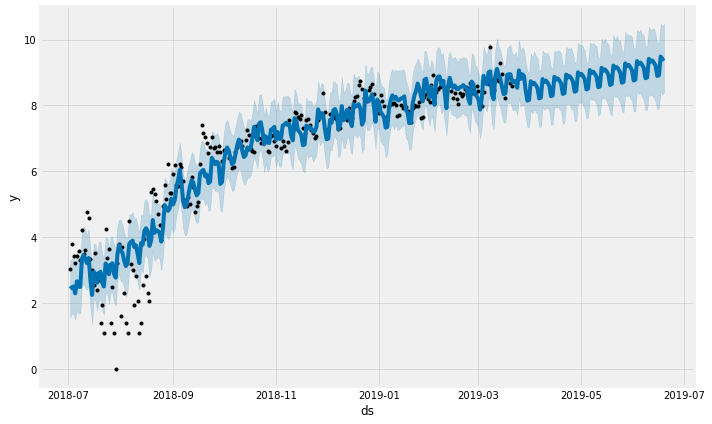

In [16]:
m2 = Prophet(holidays=articles,daily_seasonality=True).fit(df)
future2 = m2.make_future_dataframe(periods=90)
forecast2 = m2.predict(future2)
m2.plot(forecast2);

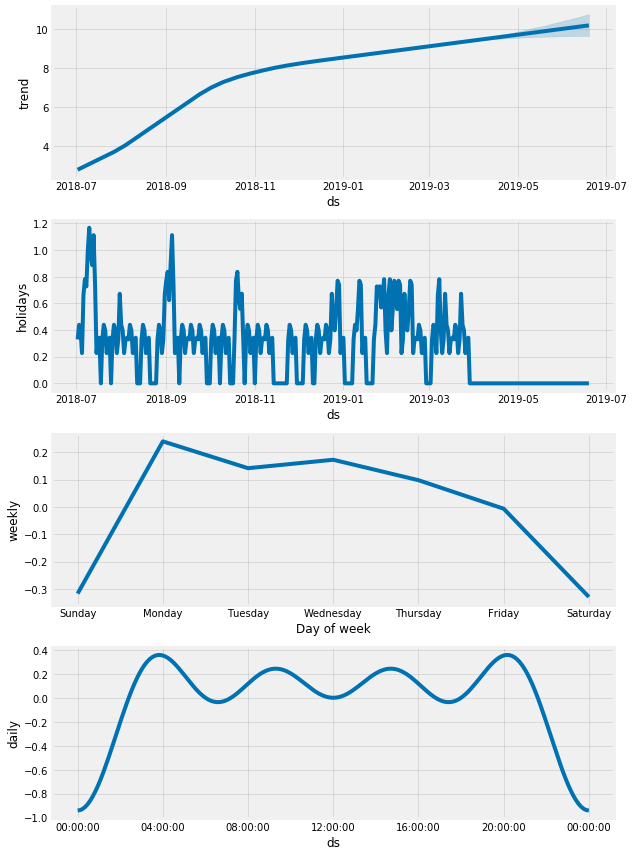

In [17]:
m2.plot_components(forecast2);

## Predicting Views for the next 15 days

In [22]:
m3 = Prophet(holidays=articles, mcmc_samples=300).fit(df)
future3 = m3.make_future_dataframe(periods=60)
forecast3 = m3.predict(future3)
forecast3["Views"] = np.exp(forecast3.yhat).round()
forecast3["Views_lower"] = np.exp(forecast3.yhat_lower).round()
forecast3["Views_upper"] = np.exp(forecast3.yhat_upper).round()
forecast3[(forecast3.ds > "3-22-2019") &
          (forecast3.ds < "4-07-2019")][["ds","Views_lower",
                                        "Views", "Views_upper"]]



INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/srv/conda/envs/notebook/lib/python3.7/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


,ds,Views_lower,Views,Views_upper
264,2019-03-23,2306.0,5787.0,14279.0
265,2019-03-24,2037.0,4741.0,11437.0
266,2019-03-25,3302.0,7988.0,19409.0
267,2019-03-26,2514.0,6125.0,14678.0
268,2019-03-27,2852.0,7065.0,17579.0
269,2019-03-28,2856.0,6744.0,16723.0
270,2019-03-29,1914.0,4346.0,11169.0
271,2019-03-30,1234.0,3179.0,8306.0
272,2019-03-31,1334.0,3241.0,7629.0
273,2019-04-01,2276.0,5689.0,14192.0


## Exporting the results to Excel

In [23]:
forecast3.to_excel('Predicted_Views.xlsx')